In [1]:
import cv2
import numpy as np

def predict_cool_vs_warm(image_path):
    # Load the image and convert to HSV
    image = cv2.imread(image_path)
    image_hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    
    # Get the hue channel
    hue = image_hsv[:, :, 0]
    
    # Define warm (0-60), neutral (60-90), and cool (90-180) ranges
    warm_mask = (hue >= 0) & (hue <= 60)
    cool_mask = (hue >= 90) & (hue <= 180)
    neutral_mask = (hue > 60) & (hue < 90)
    
    # Calculate the percentage of warm, cool, and neutral pixels
    warm_percentage = np.sum(warm_mask) / hue.size * 100
    cool_percentage = np.sum(cool_mask) / hue.size * 100
    neutral_percentage = np.sum(neutral_mask) / hue.size * 100
    
    # Decide which range is dominant
    if warm_percentage > cool_percentage:
        prediction = "Warm"
    elif cool_percentage > warm_percentage:
        prediction = "Cool"
    else:
        prediction = "Neutral"
    
    # Print results
    print(f"Warm Pixels: {warm_percentage:.2f}%")
    print(f"Cool Pixels: {cool_percentage:.2f}%")
    print(f"Neutral Pixels: {neutral_percentage:.2f}%")
    
    return prediction

# Example usage
result = predict_cool_vs_warm('./data/beach-blue.jpg')
print(f"Prediction: {result}")


Warm Pixels: 4.47%
Cool Pixels: 84.25%
Neutral Pixels: 11.28%
Prediction: Cool


In [2]:
import cv2
import numpy as np

def predict_dull_vs_bright(image_path, dull_saturation_threshold=80, dull_value_threshold=100):
    """
    Predict whether an image is Dull or Bright based on saturation and brightness thresholds.
    
    Parameters:
        image_path (str): Path to the input image.
        dull_saturation_threshold (int): Saturation threshold for dullness.
        dull_value_threshold (int): Value threshold for dullness.
    
    Returns:
        str: "Dull" or "Bright" based on the percentage of dull pixels.
    """
    # Load the image and convert to HSV
    image = cv2.imread(image_path)
    image_hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    
    # Get the saturation and value (brightness) channels
    saturation = image_hsv[:, :, 1]
    value = image_hsv[:, :, 2]
    
    # Create a mask for dull pixels
    dull_mask = (saturation < dull_saturation_threshold) & (value < dull_value_threshold)
    
    # Calculate the percentage of dull pixels
    dull_percentage = np.sum(dull_mask) / saturation.size * 100
    
    # Classify the image
    if dull_percentage > 50:  # More than 50% dull pixels
        prediction = "Dull"
    else:
        prediction = "Bright"
    
    # Print the dull percentage
    print(f"Dull Pixels: {dull_percentage:.2f}%")
    
    return prediction

# Example usage
result = predict_dull_vs_bright('./data/beach-blue.jpg')
print(f"Prediction: {result}")


Dull Pixels: 0.48%
Prediction: Bright


Percentage of Blue Regions: 93.54%


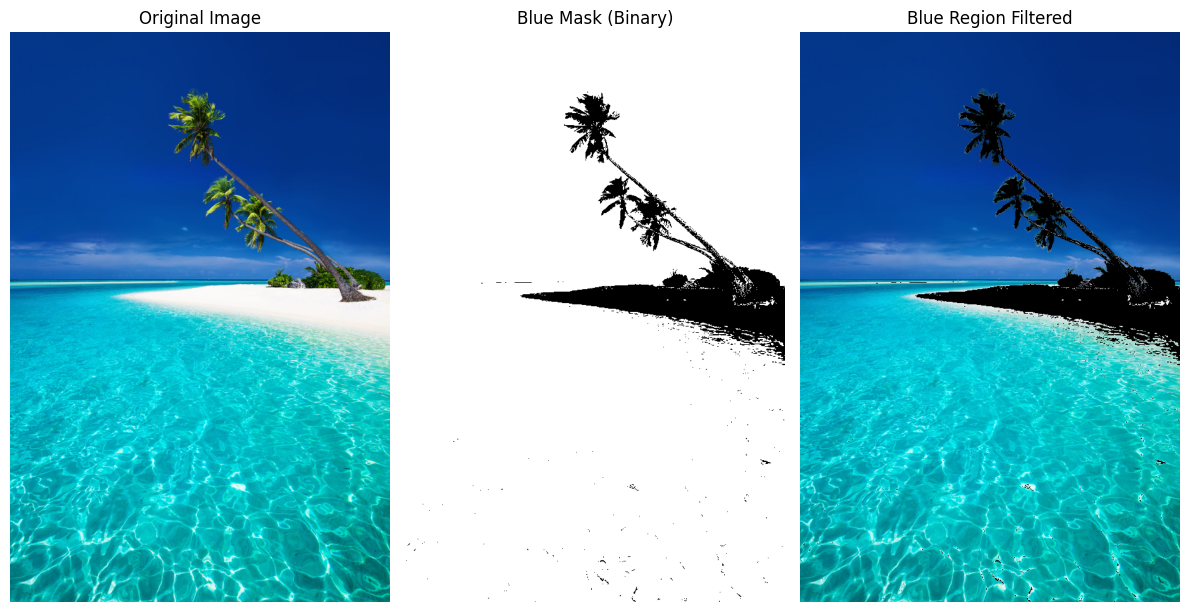

In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Define the blue range in HSV
lower_blue = np.array([80, 0, 50])
upper_blue = np.array([120, 255, 255])

# Load and convert the image
image = cv2.imread('./data/beach-blue.jpg')
image_hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Create the blue mask and apply it
mask = cv2.inRange(image_hsv, lower_blue, upper_blue)
res = cv2.bitwise_and(image_rgb, image_rgb, mask=mask)

# Calculate the percentage of blue regions
blue_percentage = np.sum(mask > 0) / mask.size * 100
print(f"Percentage of Blue Regions: {blue_percentage:.2f}%")

# Plot the results
plt.figure(figsize=(12, 6))

# Original Image
plt.subplot(1, 3, 1)
plt.imshow(image_rgb)
plt.title('Original Image')
plt.axis('off')

# Blue Mask
plt.subplot(1, 3, 2)
plt.imshow(mask, cmap='gray')
plt.title('Blue Mask (Binary)')
plt.axis('off')

# Filtered Blue Region
plt.subplot(1, 3, 3)
plt.imshow(res)
plt.title('Blue Region Filtered')
plt.axis('off')

plt.tight_layout()
plt.show()



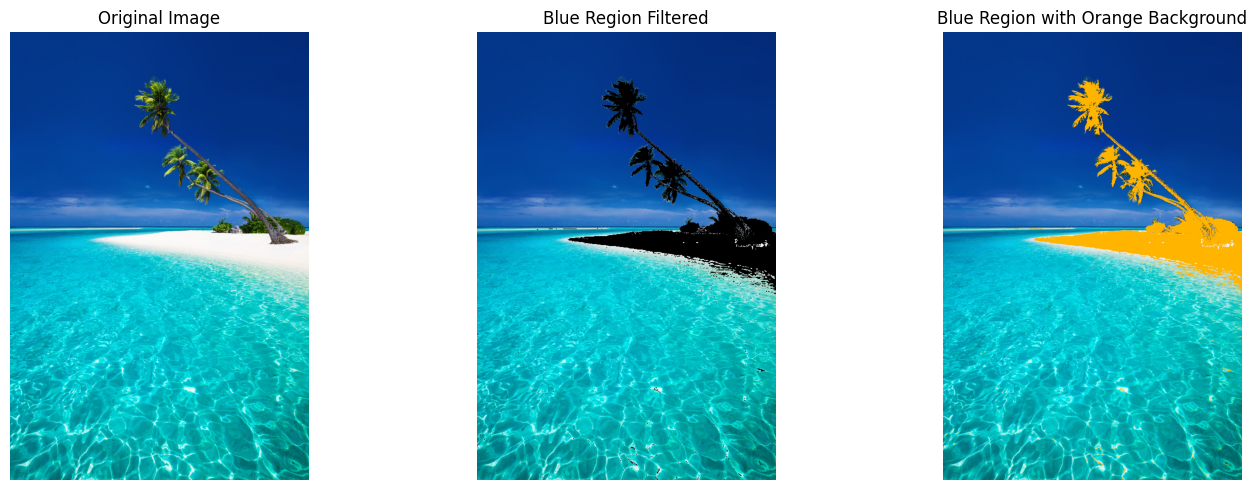

In [4]:
# Create an orange background image with the same size as the original
orange_image = np.zeros_like(image_rgb)
orange_image[:, :] = [255, 180, 0]  # RGB values for orange

# Invert the mask (non-blue regions become white, blue regions become black)
mask_inv = cv2.bitwise_not(mask)

# Keep only the orange regions where the mask is inverted
orange_part = cv2.bitwise_and(orange_image, orange_image, mask=mask_inv)

# Combine the blue-filtered regions with the orange background
final_result = cv2.add(res, orange_part)

# Plot the results
plt.figure(figsize=(15, 5))

# Original Image
plt.subplot(1, 3, 1)
plt.imshow(image_rgb)
plt.title('Original Image')
plt.axis(False)

# Blue-Filtered Image
plt.subplot(1, 3, 2)
plt.imshow(res)
plt.title('Blue Region Filtered')
plt.axis(False)

# Final Result (Blue Regions + Orange Background)
plt.subplot(1, 3, 3)
plt.imshow(final_result)
plt.title('Blue Region with Orange Background')
plt.axis(False)

plt.tight_layout()
plt.show()


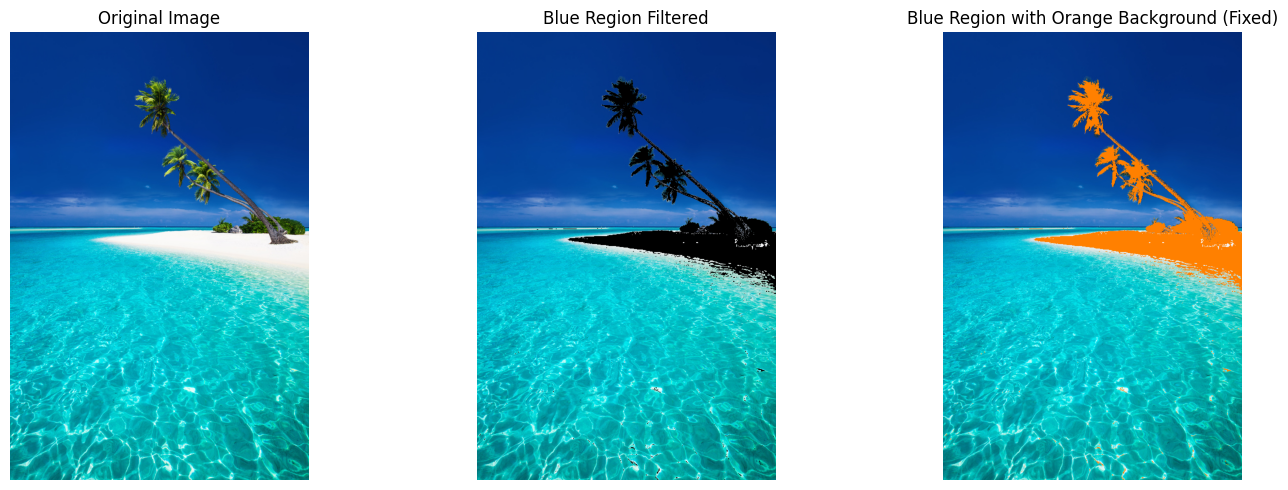

In [5]:
orange_image[:, :] = [255, 128, 0]  # Darker Orange

# Create mutually exclusive orange regions (no overlap with blue)
exclusive_orange_part = cv2.bitwise_and(orange_image, orange_image, mask=mask_inv)

# Combine blue and orange regions with proper blending
final_result = cv2.add(res, exclusive_orange_part)

# Plot the results
plt.figure(figsize=(15, 5))

# Original Image
plt.subplot(1, 3, 1)
plt.imshow(image_rgb)
plt.title('Original Image')
plt.axis('off')

# Blue-Filtered Image
plt.subplot(1, 3, 2)
plt.imshow(res)
plt.title('Blue Region Filtered')
plt.axis('off')

# Final Result (Blue Regions + Proper Orange Background)
plt.subplot(1, 3, 3)
plt.imshow(final_result)
plt.title('Blue Region with Orange Background (Fixed)')
plt.axis('off')

plt.tight_layout()
plt.show()


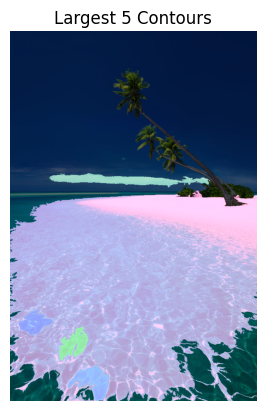

In [6]:
import cv2  # Import OpenCV for image processing
import numpy as np  # Import NumPy for numerical operations
import matplotlib.pyplot as plt  # Import Matplotlib for visualization

# Load the image in BGR format (default format for OpenCV)
image = cv2.imread('./data/beach-blue.jpg')

# Convert the image to grayscale for easier thresholding
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Convert the image to RGB format for visualization in Matplotlib
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Apply a binary threshold to the grayscale image
# Pixels with intensity > 120 are set to 180, and others are set to 0
_, thresh = cv2.threshold(gray, 120, 180, cv2.THRESH_BINARY)

# Find contours in the binary image
# cv2.RETR_TREE retrieves all the contours and reconstructs the full hierarchy
# cv2.CHAIN_APPROX_SIMPLE compresses horizontal, vertical, and diagonal segments
contours, _ = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

# Create an empty image (black) to draw the filled contours
image_filled_contours = np.zeros_like(image)

# Sort contours by area in descending order and select the top 5 largest contours
contours = sorted(contours, key=cv2.contourArea, reverse=True)[:5]

# Loop through the selected contours
for contour in contours:
    # Generate a random color for each contour (RGB values)
    color = (np.random.randint(100, 255), np.random.randint(100, 255), np.random.randint(100, 255))
    
    # Draw the current contour as a filled shape on the empty image
    cv2.drawContours(image_filled_contours, [contour], -1, color, thickness=cv2.FILLED)

# Combine the original image and the filled contours using alpha blending
# cv2.addWeighted(src1, alpha, src2, beta, gamma):
#   - src1: The first input image (original image)
#   - alpha: Weight of the first image
#   - src2: The second input image (contours)
#   - beta: Weight of the second image
#   - gamma: Brightness added to the result
image_with_filled_contours = cv2.addWeighted(image, 0.5, image_filled_contours, 0.8, 0.2)

# Display the final image with filled contours
plt.imshow(image_with_filled_contours)  # Show the image using Matplotlib
plt.title("Largest 5 Contours")  # Add a title to the plot
plt.axis(False)  # Disable grid lines for a cleaner visualization
plt.show()  # Display the plot


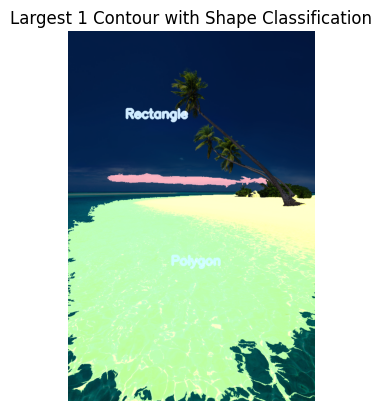

In [7]:
import cv2  # OpenCV for image processing
import numpy as np  # NumPy for numerical operations
import matplotlib.pyplot as plt  # Matplotlib for visualization

# Load the image in BGR format (OpenCV's default format)
image = cv2.imread('./data/beach-blue.jpg')

# Convert the image to grayscale for easier processing (e.g., thresholding)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Convert the original image to RGB format for proper display in Matplotlib
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Apply binary thresholding to the grayscale image
# Pixels with intensity > 120 are set to 180, and others are set to 0
_, thresh = cv2.threshold(gray, 120, 180, cv2.THRESH_BINARY)

# Find contours in the binary thresholded image
# cv2.RETR_TREE: Retrieves all contours and reconstructs the full hierarchy
# cv2.CHAIN_APPROX_SIMPLE: Compresses horizontal, vertical, and diagonal segments
contours, _ = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

# Create an empty mask to draw filled contours on
image_filled_contours = np.zeros_like(image)

# Sort contours by area (descending order) and take only the largest one
contours = sorted(contours, key=cv2.contourArea, reverse=True)[:2]

# Define a function to approximate a contour and classify its shape
def get_shape(contour):
    # Approximate the contour with a simpler polygon
    # cv2.approxPolyDP(curve, epsilon, closed)
    # epsilon is the maximum distance from the original contour to the approximated polygon
    approx = cv2.approxPolyDP(contour, 0.01 * cv2.arcLength(contour, True), True)
    
    # Classify the shape based on the number of vertices
    if len(approx) == 3:
        shape = "Triangle"
    elif len(approx) == 4:
        # For quadrilaterals, check if it's a square or rectangle
        x, y, w, h = cv2.boundingRect(approx)
        aspect_ratio = float(w) / h  # Calculate aspect ratio (width/height)
        shape = "Square" if aspect_ratio == 1 else "Rectangle"
    elif len(approx) == 5:
        shape = "Pentagon"
    elif len(approx) == 6:
        shape = "Hexagon"
    elif len(approx) > 6:
        shape = "Polygon"
    else:
        shape = "Unknown"

    return (approx, shape)

# Loop through the largest contour(s) to approximate and classify shapes
for contour in contours:
    approx, shape = get_shape(contour)  # Approximate the contour and classify its shape
    
    # Choose a color for the contour (blue in this case)
    #color = (255, 0, 0)  # RGB color for blue
    color = (np.random.randint(100, 255), np.random.randint(100, 255), np.random.randint(100, 255))
    # Draw the filled contour on the mask
    cv2.drawContours(image_filled_contours, [contour], -1, color, thickness=cv2.FILLED)
    
    # Calculate the centroid of the contour to position the shape label
    cx, cy = int(np.mean(approx[:, 0, 0])), int(np.mean(approx[:, 0, 1]))
    text_position = (cx - 150, cy - 150)  # Offset the text position for better visibility
    
    # Add the shape name as text at the centroid position
    cv2.putText(image_filled_contours, shape, text_position, cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 5)

# Combine the original image with the filled contours using alpha blending
# cv2.addWeighted(src1, alpha, src2, beta, gamma)
# alpha: Weight of the original image
# beta: Weight of the contours image
# gamma: Brightness added to the final image
image_with_filled_contours = cv2.addWeighted(image, 0.5, image_filled_contours, 0.8, 1)

# Display the final image with filled contours and shape names
plt.imshow(image_with_filled_contours)
plt.title("Largest 1 Contour with Shape Classification")
plt.axis(False)  # Turn off grid lines for cleaner display
plt.show()


Length of contour: 3197


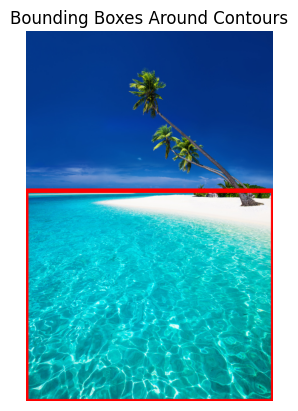

In [8]:
import cv2  # OpenCV for image processing
import numpy as np  # NumPy for numerical operations
import matplotlib.pyplot as plt  # Matplotlib for visualization

# Load the image in BGR format (OpenCV's default format)
image = cv2.imread('./data/beach-blue.jpg')

# Convert the image to grayscale for easier processing (thresholding)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply binary thresholding to the grayscale image
# Pixels with intensity > 120 are set to 180, and others are set to 0
_, thresh = cv2.threshold(gray, 120, 180, cv2.THRESH_BINARY)

# Find contours in the binary image
# cv2.RETR_TREE: Retrieves all the contours and reconstructs the hierarchy
# cv2.CHAIN_APPROX_SIMPLE: Compresses horizontal, vertical, and diagonal segments
contours, _ = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

# Sort contours by area (largest to smallest) and select the largest one
# In this case, we are selecting only the top 1 largest contour
contours = sorted(contours, key=cv2.contourArea, reverse=True)[:1]

# Create a copy of the original image to draw bounding boxes on
image_with_bboxes = image.copy()

# Loop through the selected contours
for contour in contours:
    # Print the length of the current contour
    print(f"Length of contour: {len(contour)}")
    
    # Get the bounding box coordinates for the contour
    x, y, w, h = cv2.boundingRect(contour)
    
    # Draw the bounding box around the contour on the image
    # Arguments:
    # - (x, y): Top-left corner of the bounding box
    # - (x + w, y + h): Bottom-right corner of the bounding box
    # - (0, 0, 255): RGB color (Red in this case)
    # - 10: Thickness of the bounding box lines
    cv2.rectangle(image_with_bboxes, (x, y), (x + w, y + h), (0, 0, 255), 10)

# Display the resulting image with bounding boxes
# Convert the image from BGR (OpenCV format) to RGB (Matplotlib format) for correct colors
plt.imshow(cv2.cvtColor(image_with_bboxes, cv2.COLOR_BGR2RGB))
plt.title("Bounding Boxes Around Contours")  # Add a title to the plot
plt.axis('off')  # Hide the axis for a cleaner display
plt.show()
